# MACHINE LEARNING

---

## Predictive modeling of customer bookings



In [740]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### I. Exploratory data analysis
---
First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.


In [741]:
import os
os.chdir('C:\\Users\\Admin\\Desktop\\Virtual Internship\\British Airway')
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0



The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


#### Categorical Variable

In [743]:
def categorical_value(col):
    print (df[col].unique())

categorical_value('sales_channel')
categorical_value('trip_type')
categorical_value('booking_origin')
categorical_value('route')

['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua' 'Maldives' 'Egypt' 'Israel' 'Tunis

(<Figure size 432x288 with 3 Axes>,
 {('0', '1'): (0.0, 0.0, 0.8462089552238806, 0.6531541772943487),
  ('0', '0'): (0.0,
   0.6564764364305613,
   0.8462089552238806,
   0.3435235635694386),
  ('1', '1'): (0.8511840796019902, 0.0, 0.14881592039801, 0.7427768186458794),
  ('1', '0'): (0.8511840796019902,
   0.7460990777820921,
   0.14881592039801,
   0.25390092221790783)})

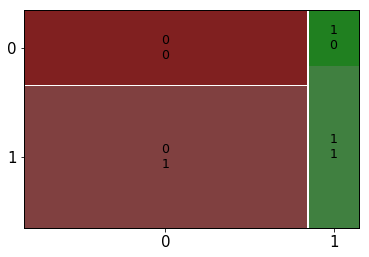

In [744]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['booking_complete', 'wants_extra_baggage'])

(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.8462089552238806, 0.7102752829451895),
  ('0', '1'): (0.0,
   0.713597542081402,
   0.8462089552238806,
   0.28640245791859786),
  ('1', '0'): (0.8511840796019902, 0.0, 0.14881592039801, 0.6462811400706746),
  ('1', '1'): (0.8511840796019902,
   0.6496033992068873,
   0.14881592039801,
   0.3503966007931127)})

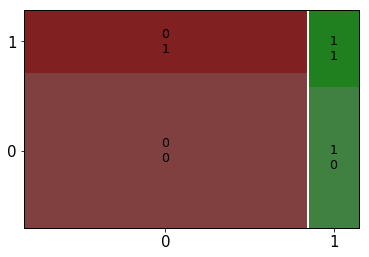

In [745]:
mosaic(df, ['booking_complete', 'wants_preferred_seat'])

(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.8462089552238806, 0.576437977542522),
  ('0', '1'): (0.0,
   0.5797602366787347,
   0.8462089552238806,
   0.4202397633212653),
  ('1', '0'): (0.8511840796019902, 0.0, 0.14881592039801, 0.5397893621955521),
  ('1', '1'): (0.8511840796019902,
   0.5431116213317647,
   0.14881592039801,
   0.4568883786682352)})

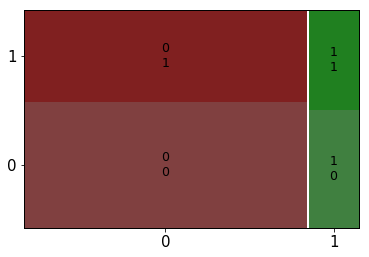

In [746]:
mosaic(df, ['booking_complete', 'wants_in_flight_meals'])

> Overall, a customized booking (extra baggage, preferred seat, meals) means a slightly higher chance that it would be completed.
We will perform a statistical test to check if they are significant predictors: Chi2 which makes no assumptions about group size.

In [747]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def Chi2(col, target= df['booking_complete']):
    table= pd.crosstab(df[col], target, margins = False)
    print(table)
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)
    #interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
Chi2('wants_in_flight_meals')
Chi2('wants_extra_baggage')
Chi2('wants_preferred_seat')

booking_complete           0     1
wants_in_flight_meals             
0                      24593  4050
1                      17929  3428
dof=1
[[24359.15292  4283.84708]
 [18162.84708  3194.15292]]
probability=0.950, critical=3.841, stat=34.991
Dependent (reject H0)
booking_complete         0     1
wants_extra_baggage             
0                    14656  1905
1                    27866  5573
dof=1
[[14084.13684  2476.86316]
 [28437.86316  5001.13684]]
probability=0.950, critical=3.841, stat=231.737
Dependent (reject H0)
booking_complete          0     1
wants_preferred_seat             
0                     30303  4849
1                     12219  2629
dof=1
[[29894.66688  5257.33312]
 [12627.33312  2220.66688]]
probability=0.950, critical=3.841, stat=125.273
Dependent (reject H0)


> The result shows that they are useful predictors

#### Numerical Variables

In [748]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

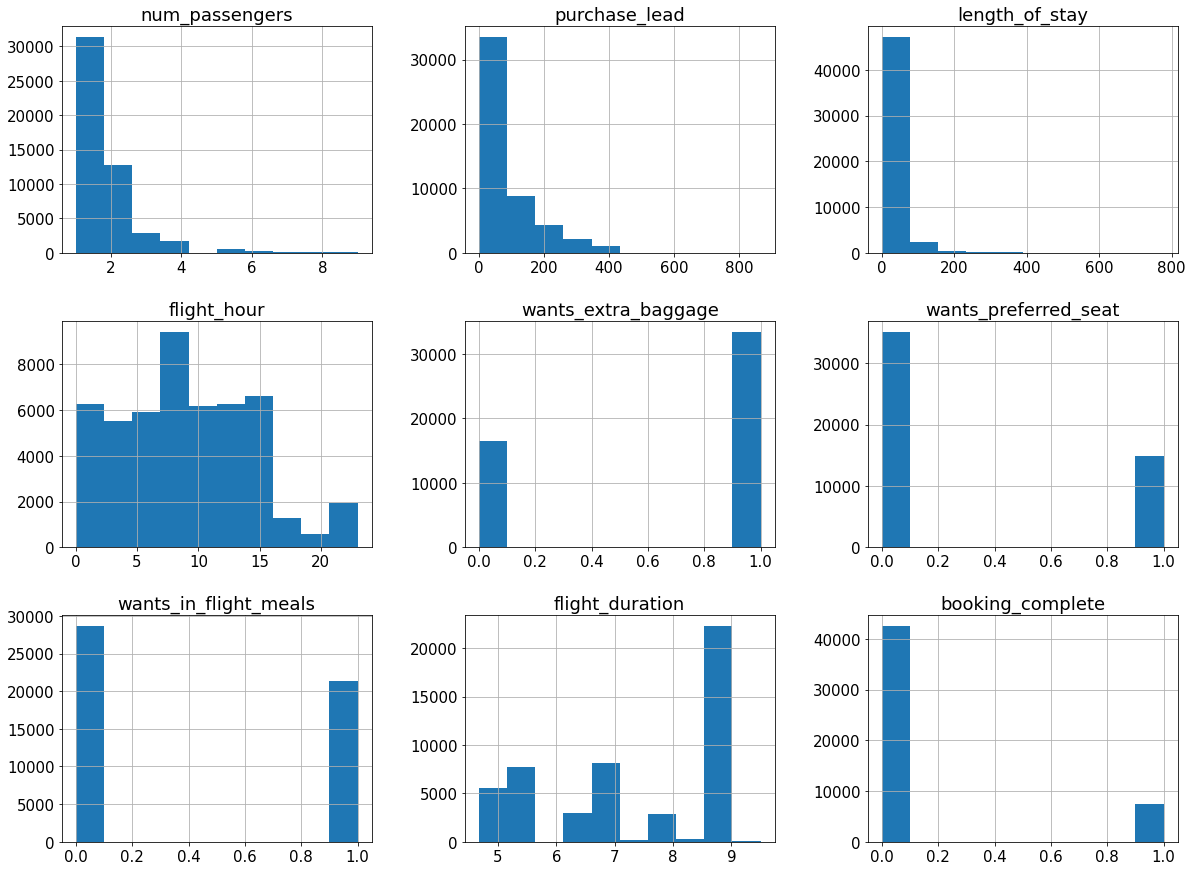

In [749]:
df.hist(bins=10, figsize = (20,15))
plt.show()

### Check corellation matrix with a balanced dataset

In [750]:
from sklearn.model_selection import train_test_split

def Split():
    global x
    global y
    
    global x_train
    global x_test
    global y_test
    global y_train

    y= df["booking_complete"]
    x= df.drop(["booking_complete"], axis= 1)
    
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.15, stratify= y, random_state= 42)


In [751]:
Split()

In [752]:
undersample = RandomUnderSampler()
subsample_x, subsample_y= undersample.fit_resample(x_train, y_train)
subsample= pd.concat([subsample_x, subsample_y], axis=1)

In [753]:
subsample

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,344,54,4,Sun,HANOOL,Vietnam,0,0,0,8.83,0
1,1,Mobile,RoundTrip,28,6,7,Sat,DMKOOL,Qatar,0,0,1,8.83,0
2,2,Internet,RoundTrip,41,59,6,Mon,IKAPUS,South Korea,1,1,1,8.15,0
3,2,Internet,RoundTrip,352,5,11,Mon,DMKKIX,Thailand,0,0,0,7.00,0
4,1,Mobile,RoundTrip,13,19,12,Tue,DACHND,Bangladesh,0,0,0,7.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12707,2,Internet,RoundTrip,38,6,16,Sat,MELPEN,Malaysia,1,0,0,8.83,1
12708,2,Internet,RoundTrip,6,5,13,Thu,JHBKIX,Malaysia,1,1,0,7.00,1
12709,1,Internet,RoundTrip,61,4,5,Fri,PEKPEN,Malaysia,1,1,1,6.42,1
12710,1,Internet,RoundTrip,11,3,9,Fri,AKLKUL,Malaysia,1,1,1,8.83,1


In [754]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df= subsample, res_var='result', anova_model= 'booking_complete ~ C(flight_day)+ C(route)+ C(booking_origin)+ C(trip_type)+ C(sales_channel)+ flight_duration+ wants_in_flight_meals+ wants_preferred_seat+ wants_extra_baggage+ flight_hour + length_of_stay+ purchase_lead+ num_passengers')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(flight_day),6.0,2.109313,0.351552,1.914361,7.455901e-02
C(route),676.0,385.977829,0.570973,3.109207,1.726742e-129
C(booking_origin),68.0,155.106994,2.280985,12.420997,3.860067e-129
C(trip_type),2.0,3.089457,1.544728,8.411745,2.235600e-04
C(sales_channel),1.0,18.947430,18.947430,103.177335,3.840373e-24
flight_duration,1.0,0.261394,0.261394,1.423411,2.328665e-01
wants_in_flight_meals,1.0,3.367780,3.367780,18.339087,1.863188e-05
wants_preferred_seat,1.0,5.971350,5.971350,32.516706,1.209723e-08
wants_extra_baggage,1.0,12.781231,12.781231,69.599586,8.060008e-17
flight_hour,1.0,0.002873,0.002873,0.015643,9.004692e-01


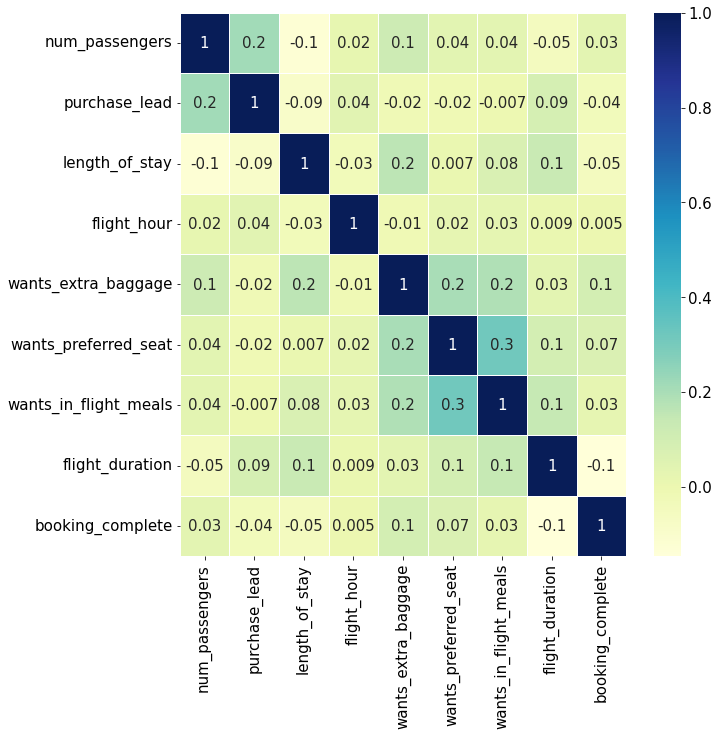

In [755]:
ig, ax = plt.subplots(figsize=(10, 10))
cm = sns.heatmap(subsample.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')

> No multicolinearity detected.

> Positive Correlated with target: flight_hour, num_passengers.

> Negative Correlated with target: flight_duration, length_of_stay, purchase_lead


Boxplots of numerical variables with small range:

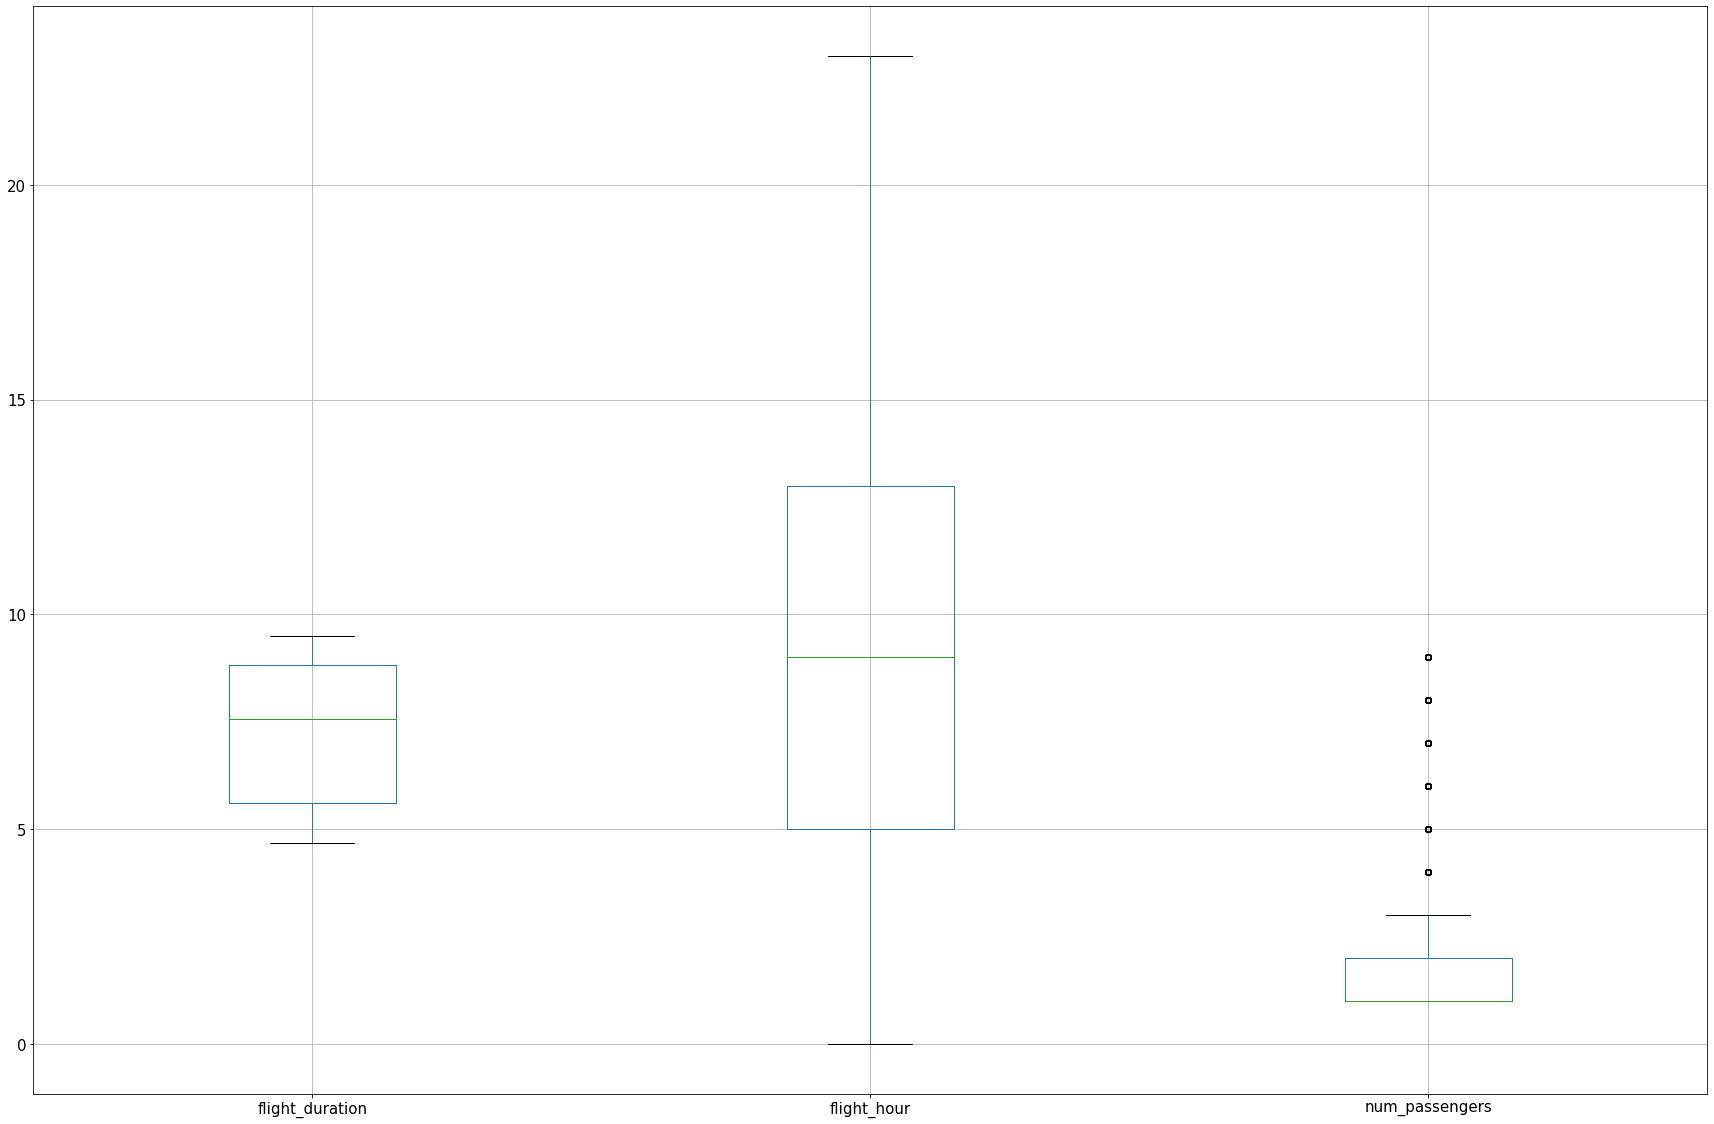

In [756]:
small_num= ['flight_duration', 'flight_hour', 'num_passengers']
df[small_num].boxplot(figsize=(30,20))
plt.show()

Boxplots of numerical variables with large range:

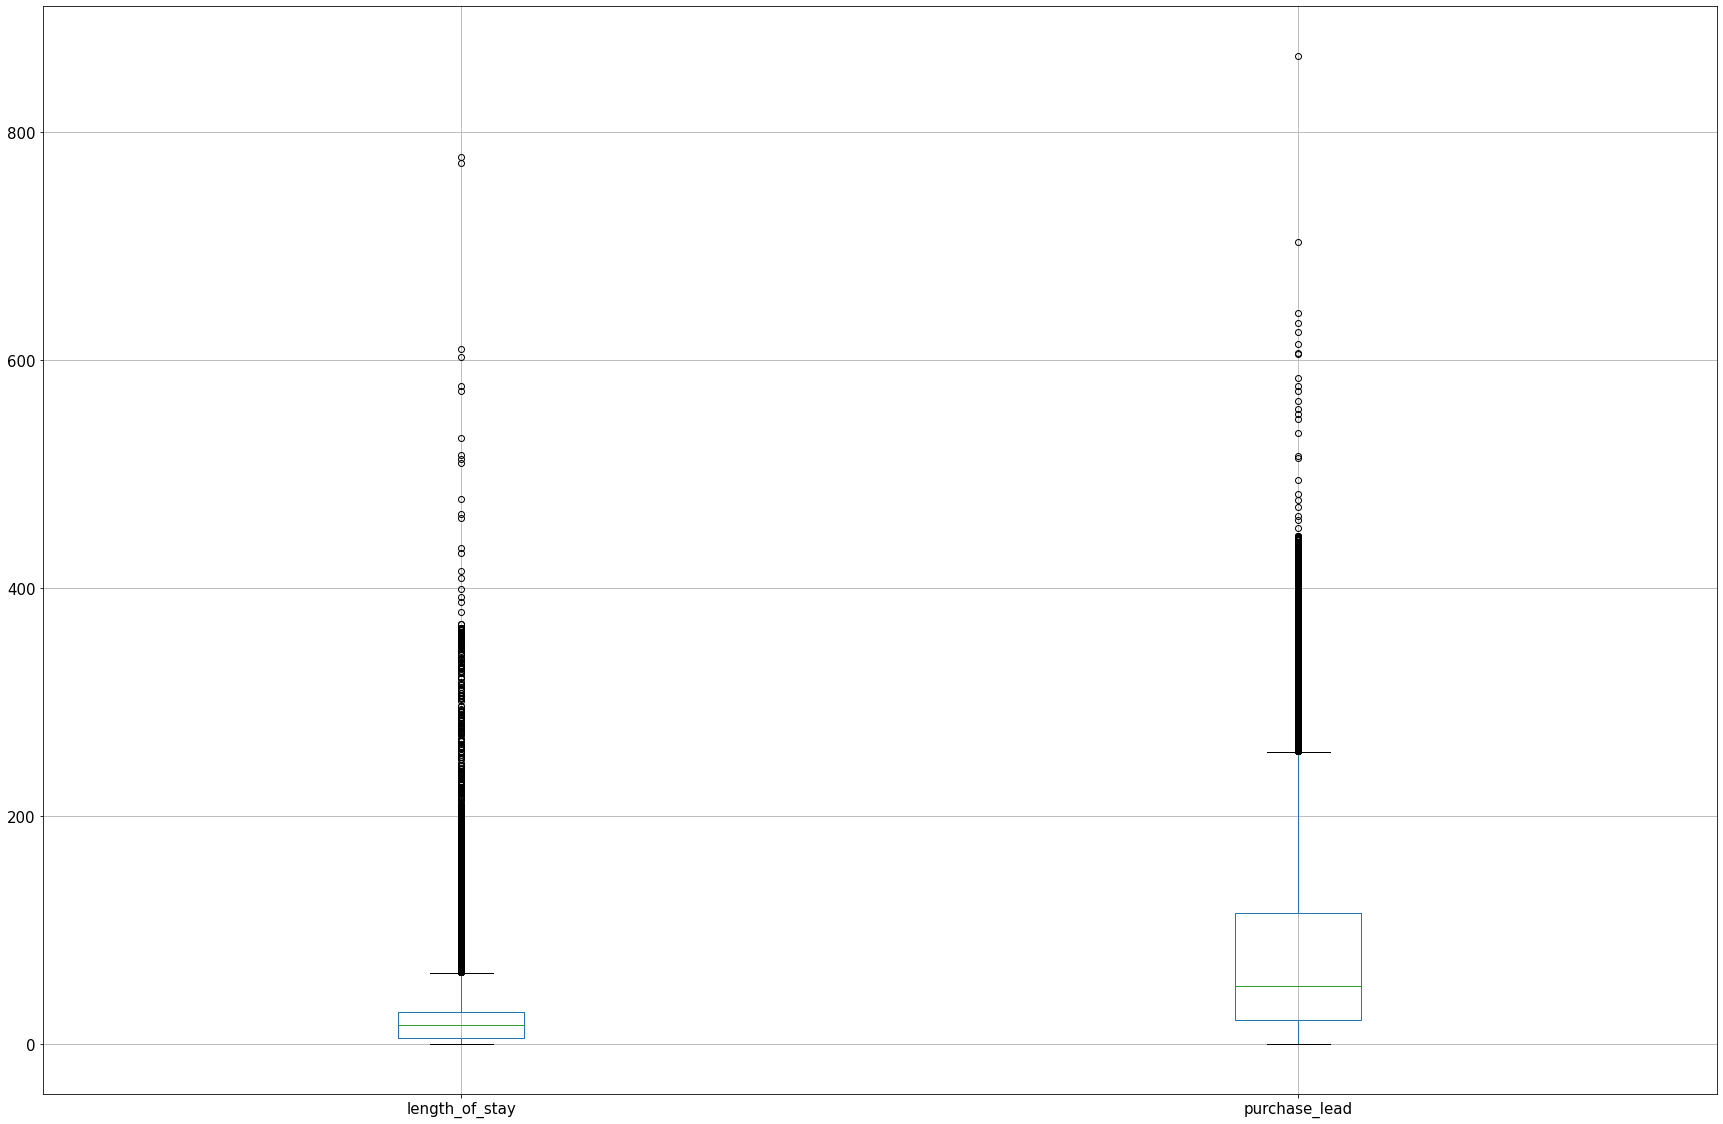

In [757]:
large_num= ['length_of_stay', 'purchase_lead']
df[large_num].boxplot(figsize=(30,20))
plt.show()

> As can be observed clearly, large-ranged columns has heaps of extreme outliers!

### II. Data Preprocessing

#### 1. Categorical Encoding

booking_origin, route: Calculating the gap of the complete and noncomplete bookings to encode each factors.

sales_channel, trip_type: Using label encoding method.

In [758]:
from feature_engine.encoding import CountFrequencyEncoder
def Encode():    
    #Column booking_origin
    global df
    table= pd.crosstab(df['booking_origin'], df['booking_complete'], margins = False)
    table["country"]= table.index
    table["gap"]= (table[0]-table[1])/(table[0]+table[1])
    table.drop(table.columns[[0, 1]], axis= 1, inplace= True)
    
    booking_origin_code= dict(table.values)
    df['booking_origin']= df.booking_origin.map(booking_origin_code)
    
    #Column route
    #route_code= Code(df['route'])
    table= pd.crosstab(df['route'], df['booking_complete'], margins = False)
    table["routes"]= table.index 
    table["gap"]= (table[0]-table[1])/(table[0]+table[1])
    table.drop(table.columns[[0, 1]], axis= 1, inplace= True)
    
    route_code= dict(table.values)
    df['route']= df.route.map(route_code)
    
    #Column flight_day
    table= pd.crosstab(df['flight_day'], df['booking_complete'], margins = False)
    table["flight_days"]= table.index 
    table["gap"]= (table[0]-table[1])/(table[0]+table[1])
    table.drop(table.columns[[0, 1]], axis= 1, inplace= True)
    
    flight_day_code= dict(table.values)
    df['flight_day']= df.flight_day.map(flight_day_code)
    
    #Column sales_channel
    sales_channel_code= {'Internet': 0, 'Mobile': 1}
    df['sales_channel']= df.sales_channel.map(sales_channel_code)
    
    #Column trip_type
    trip_type_code= {'CircleTrip': 0, 'OneWay': 1, 'RoundTrip': 2}
    df['trip_type']= df.trip_type.map(trip_type_code)

In [759]:
Encode()
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,0.703716,1.000000,0.899441,1,0,0,5.52,0
1,1,0,2,112,20,3,0.703716,1.000000,0.899441,0,0,0,5.52,0
2,2,0,2,243,22,17,0.673703,1.000000,0.793701,1,1,0,5.52,0
3,1,0,2,96,31,4,0.703716,1.000000,0.899441,0,0,1,5.52,0
4,2,0,2,68,22,15,0.673703,1.000000,0.793701,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,0.703716,0.882353,0.899284,1,0,1,5.62,0
49996,1,0,2,111,6,4,0.717119,0.882353,0.899284,0,0,0,5.62,0
49997,1,0,2,24,6,22,0.703716,0.882353,0.899284,0,0,1,5.62,0
49998,1,0,2,15,6,11,0.702789,0.882353,0.899284,1,0,1,5.62,0


#### 2, Outlier handling

<AxesSubplot:xlabel='booking_complete', ylabel='num_passengers'>

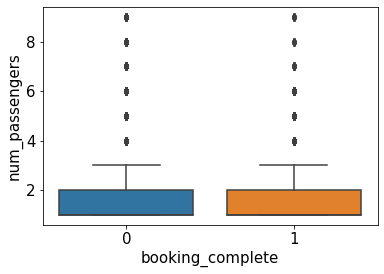

In [760]:
sns.boxplot(x= "booking_complete", y= "num_passengers", data= df)

> There's not much of difference between to class in this variable despite outliers. Plus, it is basically an ordinal categorical value so there are not too many levels to remove. 

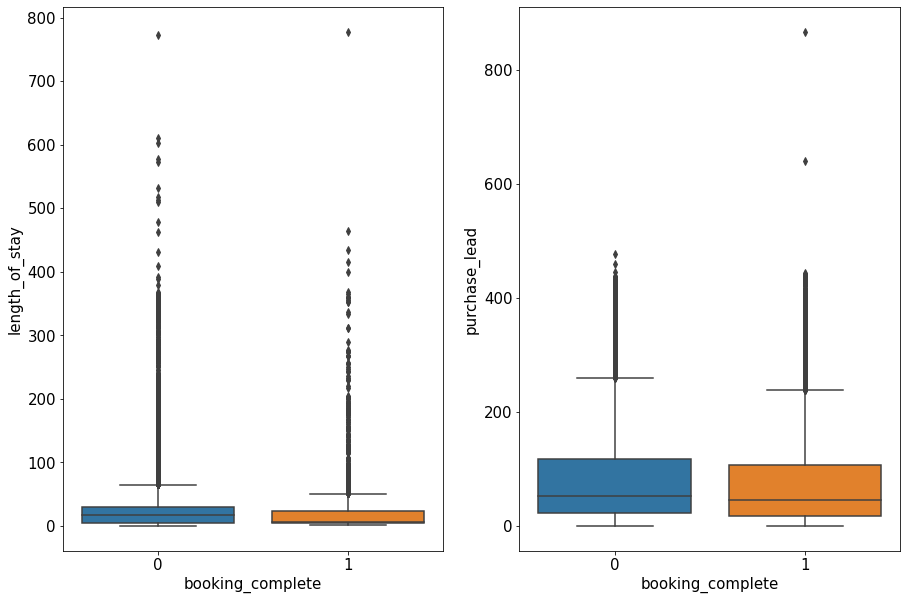

In [761]:
f, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(15, 10))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x= "booking_complete", y= "length_of_stay", data= df, ax= ax1)

sns.boxplot(x= "booking_complete", y= "purchase_lead", data= subsample, ax=ax2)


plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase Lead \n (Completed Bookings)')

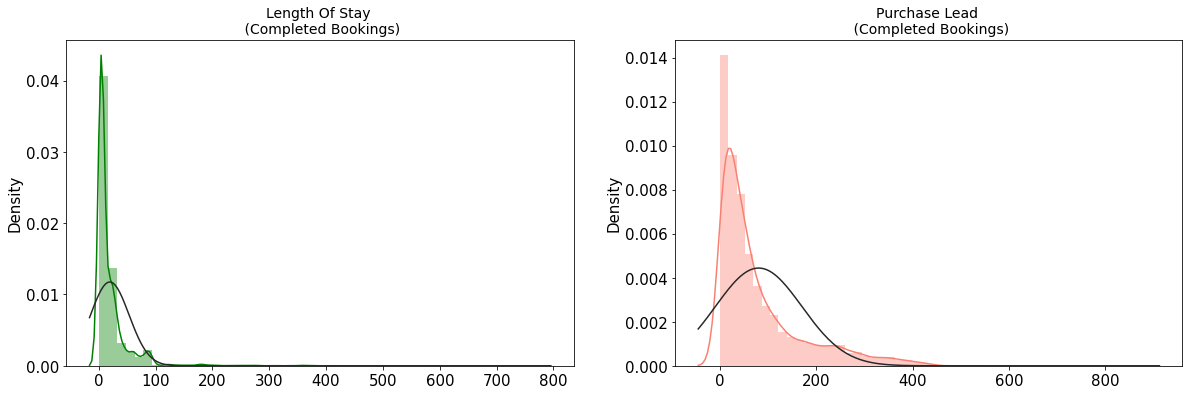

In [762]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))


length_of_stay= df['length_of_stay'].loc[df['booking_complete'] == 1].values
sns.distplot(length_of_stay, ax=ax1, fit=norm, color= 'Green')
ax1.set_title('Length Of Stay \n (Completed Bookings)', fontsize=14)

purchase_lead= df['purchase_lead'].loc[df['booking_complete'] == 1].values
sns.distplot(purchase_lead, ax=ax2, fit=norm, color='Salmon')
ax2.set_title('Purchase Lead \n (Completed Bookings)', fontsize=14)


In [763]:
#Remove Outliers
def RemoveOutliers(data, col):
    global df
    q25, q75= np.percentile(data, 25), np.percentile(data, 75)
    iqr= q75- q25
    cut_off= iqr* 1.5
    lower_bound, upper_bound= q25- cut_off, q75+ cut_off
    outliers= [x for x in data if x< lower_bound or x> upper_bound]
    df= df.drop(df[((df[col]> upper_bound) | (df[col]< lower_bound))].index)

In [764]:
RemoveOutliers(df["length_of_stay"], 'length_of_stay')
RemoveOutliers(df["purchase_lead"], 'purchase_lead')


#### 3. Resampling

In [765]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule

def Undersampling():
    global x_train
    global y_train

    undersample = RandomUnderSampler(sampling_strategy='majority')
    x_train, y_train= undersample.fit_resample(x_train, y_train)


In [766]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


def Oversampling():
    global x_train
    global y_train
    
    over= RandomUnderSampler(sampling_strategy='majority')
    x_train, y_train= over.fit_resample(x_train, y_train)
#     ncr = NeighbourhoodCleaningRule()
#     smote = SMOTE()
#     x_train, y_train= ncr.fit_resample(x_train, y_train)


#### 4. Scaling

In [767]:
from sklearn.preprocessing import StandardScaler
def scale(data):
    std= StandardScaler().fit(data)
    data= std.transform(data)
    return data


### III. Building Models

In [768]:
Split()
Oversampling()
x_train= scale(x_train)
x_test= scale(x_test)

In [769]:
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report as res

#### 1. Logistic Regression

In [770]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state= 42)
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
print('recall score:', recall_score(y_test, lr_predict))
print('ROCAUC score:',roc_auc_score(y_test, lr_predict, multi_class= 'ovr'))
print('Accuracy score:',accuracy_score(y_test, lr_predict))
print('F1 score:',f1_score(y_test, lr_predict))


recall score: 0.8641975308641975
ROCAUC score: 0.7526372409642073
Accuracy score: 0.6746019477508116
F1 score: 0.4438573315719947


#### 2. Gradient Boosting 

In [795]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbc= GradientBoostingClassifier(random_state= 42)

# fit the model with the training data
gbc.fit(x_train, y_train)
gbc_predict = gbc.predict(x_test)
print('recall score:', recall_score(y_test, gbc_predict))
print('ROCAUC score:', roc_auc_score(y_test, gbc_predict))
print('Accuracy score:',accuracy_score(y_test, gbc_predict))
print('F1 score:',f1_score(y_test, gbc_predict))
print('Precision score:', precision_score(y_test, gbc_predict))
print("result:", res(y_test, gbc_predict))


recall score: 0.8251028806584362
ROCAUC score: 0.7615599904474644
Accuracy score: 0.7171123821301593
F1 score: 0.4670937682003494
Precision score: 0.3257514216084484
result:               precision    recall  f1-score   support

           0       0.96      0.70      0.81      5497
           1       0.33      0.83      0.47       972

    accuracy                           0.72      6469
   macro avg       0.64      0.76      0.64      6469
weighted avg       0.86      0.72      0.76      6469



#### 3. Random Forest

In [789]:
Split()
Oversampling()

In [773]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(oob_score= True, random_state= 42, n_estimators= 120)
rfc.fit(x_train, y_train)


rfc_predict = rfc.predict(x_test)# check performance
print('recall score:', recall_score(y_test, rfc_predict))
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict, multi_class= 'ovr'))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))
print("result:", res(y_test, rfc_predict))

recall score: 0.8127572016460906
ROCAUC score: 0.7579339946742368
Accuracy score: 0.7195857164940486
F1 score: 0.46552740129640546
result:               precision    recall  f1-score   support

           0       0.96      0.70      0.81      5497
           1       0.33      0.81      0.47       972

    accuracy                           0.72      6469
   macro avg       0.64      0.76      0.64      6469
weighted avg       0.86      0.72      0.76      6469



#### 4.XGB

In [792]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

xgb= XGBClassifier(learning_rate=0.03, eval_metric= 'auc', random_state= 42)#, n_estimators= 90, subsample= 0.2, min_child_weight= 5)
eval_set = [(x_train, y_train), (x_test, y_test)]

xgb.fit(x_train, y_train, eval_set=eval_set)
xgb_predict = xgb.predict(x_test)
print('recall score:', recall_score(y_test, xgb_predict))
print('ROCAUC score:', roc_auc_score(y_test, xgb_predict))
print('Accuracy score:',accuracy_score(y_test, xgb_predict))
print('F1 score:',f1_score(y_test, xgb_predict))
print('Precision score:', precision_score(y_test, xgb_predict))
print("result:", res(y_test, xgb_predict))


[0]	validation_0-auc:0.80836	validation_1-auc:0.81303
[1]	validation_0-auc:0.80850	validation_1-auc:0.81444
[2]	validation_0-auc:0.81062	validation_1-auc:0.81577
[3]	validation_0-auc:0.81102	validation_1-auc:0.81684
[4]	validation_0-auc:0.81108	validation_1-auc:0.81665
[5]	validation_0-auc:0.81180	validation_1-auc:0.81716
[6]	validation_0-auc:0.81502	validation_1-auc:0.81925
[7]	validation_0-auc:0.81565	validation_1-auc:0.82049
[8]	validation_0-auc:0.81591	validation_1-auc:0.82029
[9]	validation_0-auc:0.81620	validation_1-auc:0.82024
[10]	validation_0-auc:0.81676	validation_1-auc:0.82131
[11]	validation_0-auc:0.81788	validation_1-auc:0.82132
[12]	validation_0-auc:0.81841	validation_1-auc:0.82167
[13]	validation_0-auc:0.81903	validation_1-auc:0.82201
[14]	validation_0-auc:0.81935	validation_1-auc:0.82230
[15]	validation_0-auc:0.81984	validation_1-auc:0.82276
[16]	validation_0-auc:0.82003	validation_1-auc:0.82300
[17]	validation_0-auc:0.82079	validation_1-auc:0.82359
[18]	validation_0-au

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


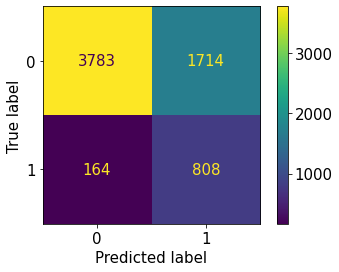

In [793]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,
                      x_test,                   
                      y_test,
                      values_format= 'd',                      
                     )

### IV. Optimization

In [781]:
Split()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

auc: 0.7331823166382601
accuracy: 0.7416653159330306
precision: 0.3337461602334553
recall: 0.7210526315789474
f1: 0.4562718554449116


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


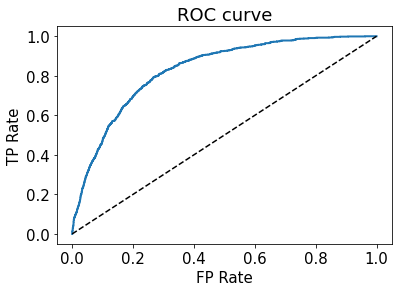

In [729]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

Accuracy= []
Precision= []
Recall= []
F1= []
Auc= []

# Instantiate LR 
lr= LogisticRegression()

# LR parameters 
lr_params = {"penalty": ['l1', 'l2'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Instantiate Random Search CV 
op_lr= GridSearchCV(lr, lr_params)#, n_iter= 10)

# Implementing SMOTE Technique 
# Cross Validating the right way
KFold= StratifiedKFold(n_splits=5, random_state= 42, shuffle= True)
xval= x_train.values
yval= y_train.values

for train, test in KFold.split(xval, yval):
    pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), op_lr)
    model = pipeline.fit(xval[train], yval[train])
    best_est = op_lr.best_estimator_
    prediction = best_est.predict(xval[test])
    
    Accuracy.append(pipeline.score(xval[test], yval[test]))
    Precision.append(precision_score(yval[test], prediction))
    Recall.append(recall_score(yval[test], prediction))
    F1.append(f1_score(yval[test], prediction))
    Auc.append(roc_auc_score(yval[test], prediction))

print("auc: {}".format(np.mean(Auc)))
print("accuracy: {}".format(np.mean(Accuracy)))
print("precision: {}".format(np.mean(Precision)))
print("recall: {}".format(np.mean(Recall)))
print("f1: {}".format(np.mean(F1)))

op_lr_predict = best_est.predict_proba(x_test)[:, 1].reshape(-1,1)

fpr, tpr, thresholds = roc_curve(y_test, op_lr_predict)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 15
plt.title('ROC curve')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.show()

In [ ]:
Accuracy= []
Precision= []
Recall= []
F1= []
Auc= []

# Instantiate gbc 
gbc= GradientBoostingClassifier()

# gbc parameters 
gbc_params= {"n_estimators": range(70, 120, 20),
             "subsample" : [0.2, 0.4, 0.6, 1],
            }

# Instantiate Random Search CV 
op_gbc= GridSearchCV(gbc, gbc_params)


KFold= StratifiedKFold(n_splits=5, random_state= 42, shuffle=True)
xval= x_train.values
yval= y_train.values

for train, test in KFold.split(xval, yval):
    pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), op_gbc) 
    model = pipeline.fit(xval[train], yval[train])
    best_est = op_gbc.best_estimator_
    prediction = best_est.predict(xval[test])
    
    Accuracy.append(pipeline.score(xval[test], yval[test]))
    Precision.append(precision_score(yval[test], prediction))
    Recall.append(recall_score(yval[test], prediction))
    F1.append(f1_score(yval[test], prediction))
    Auc.append(roc_auc_score(yval[test], prediction))
    

print("auc: {}".format(np.mean(Auc)))
print("accuracy: {}".format(np.mean(Accuracy)))
print("precision: {}".format(np.mean(Precision)))
print("recall: {}".format(np.mean(Recall)))
print("f1: {}".format(np.mean(F1)))

op_gbc_predict = best_est.predict_proba(x_test)[:, 1].reshape(-1,1)

fpr, tpr, thresholds = roc_curve(y_test, op_gbc_predict)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 15
plt.title('ROC curve')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.show()

auc: 0.7428655969159774
accuracy: 0.7154741745001463
precision: 0.3184540272728126
recall: 0.7820326678765881
f1: 0.4525559681494252


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


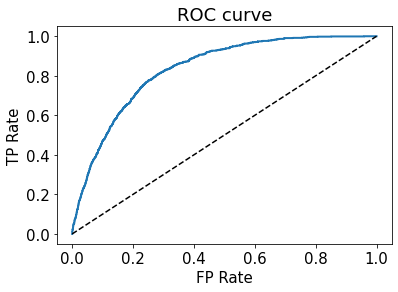

In [785]:
Accuracy= []
Precision= []
Recall= []
F1= []
Auc= []

# Instantiate xgb 
xgb= XGBClassifier()

# xgb parameters 
xgb_params= {"n_estimators": range(70, 120, 20),
             "subsample" : [0.2, 0.6, 1],
             "min_child_weight": range(5, 50, 20),
             #"max_depth": [3, 5, 7],
            }
op_xgb= GridSearchCV(xgb, xgb_params)

KFold= StratifiedKFold(n_splits=5, random_state= 42, shuffle=True)
xval= x_train.values
yval= y_train.values

for train, test in KFold.split(xval, yval):
    pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), op_xgb) 
    model = pipeline.fit(xval[train], yval[train])
    best_est = op_xgb.best_estimator_
    prediction = best_est.predict(xval[test])
    
    Accuracy.append(pipeline.score(xval[test], yval[test]))
    Precision.append(precision_score(yval[test], prediction))
    Recall.append(recall_score(yval[test], prediction))
    F1.append(f1_score(yval[test], prediction))
    Auc.append(roc_auc_score(yval[test], prediction))
    

print("auc: {}".format(np.mean(Auc)))
print("accuracy: {}".format(np.mean(Accuracy)))
print("precision: {}".format(np.mean(Precision)))
print("recall: {}".format(np.mean(Recall)))
print("f1: {}".format(np.mean(F1)))

op_xgb_predict = best_est.predict_proba(x_test)[:, 1].reshape(-1,1)

fpr, tpr, thresholds = roc_curve(y_test, op_xgb_predict)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 15
plt.title('ROC curve')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:>

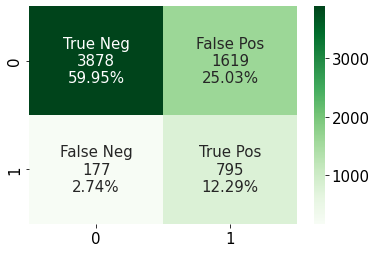

In [786]:
y_predict= best_est.predict(x_test)

# Confusion Matrix 
Matrix= confusion_matrix(y_test, y_predict)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in Matrix.flatten()]
                
group_percentages = ["{0:.2%}".format(value) for value in
                     Matrix.flatten()/np.sum(Matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)



sns.heatmap(Matrix, annot=labels, fmt='', cmap= 'Greens')